In [1]:
import itertools
import pandas
import numpy
import glob
import tqdm
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# settings
protocols = ['fotb', 'totb', 'htlltb', 'htlltbtest']
n_processes = [3, 6, 9, 12]
workload_time = 180
prefixes = [str(a) + "-" + str(b) for a,b in itertools.product(protocols, n_processes)]
colours = ["r", "g", "b", "k"]
markers = ["o", "v", "^", "x"]
linestyles = ['-','--',':','-.']


In [3]:
# check data
print("number of log files: %s" % len(glob.glob('../data/*.log')))
print("expected number of log files: %s" % (len(protocols) * sum(n_processes)))


number of log files: 120
expected number of log files: 120


16it [07:14, 27.18s/it]


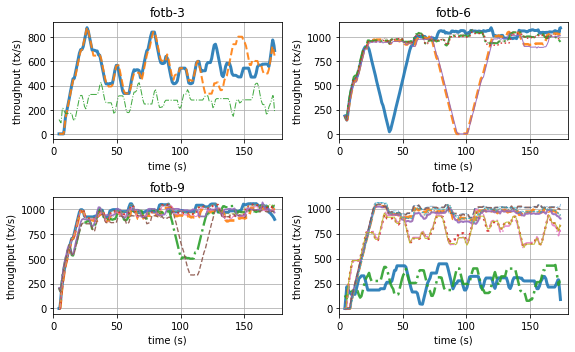

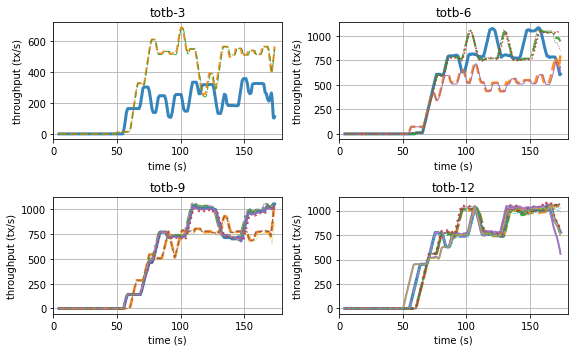

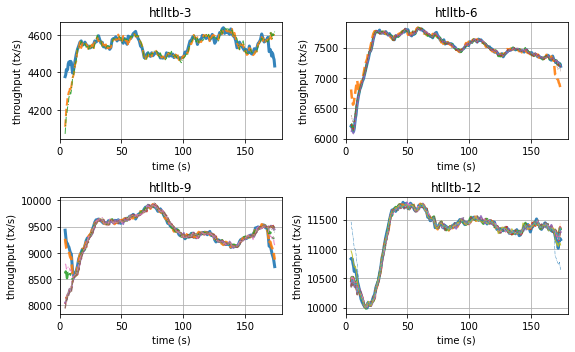

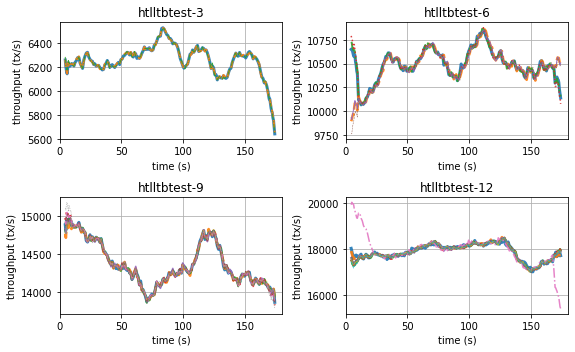

In [4]:
# throughput time series for each process
for i, prefix in tqdm.tqdm(enumerate(prefixes)):
    if i%4==0:
        fig, axs = plt.subplots(2, 2, figsize=(1.618 * 5, 5), sharex=True)
        axs = numpy.ravel(axs)
    files = glob.glob('../data/' + prefix + '*')
    for j, file in enumerate(files):
        d = pandas.read_csv(file, sep=' ', comment="{") 
        d["t"] = d["time"] - d["time"].min()
        d["prefix"] = prefix
        d["file"] = file
        d = pandas.merge(d, d[d["operation"] == "deliver"], on=["processid", "messagenumber"], how="left", suffixes=('', '_y'))
        d["latency"] = d["t_y"] - d["t"]
        d["t"] = d["t_y"]
        d = d.filter(["prefix", "file", "operation", "processid", "messagenumber", "t", "latency"])
        df = d
        average_throughput_time_series = pandas.DataFrame(pandas.DataFrame(df[(df["operation"] == "deliver") & (df["t"] < workload_time)]["t"].astype(int)).groupby("t").size()).reset_index().rename({0: "throughput"}, axis=1)
        average_throughput_time_series["throughput"] = average_throughput_time_series["throughput"] / float(df["file"].unique().shape[0])
        average_throughput_time_series = average_throughput_time_series.merge(pandas.DataFrame(range(180), columns=["t"]), on="t", how="right", sort=True).fillna(0.0)
        rz = average_throughput_time_series.rolling(window=20, min_periods=0, center=True).mean()
        lw=3*(1-1*j/len(files))
        ls=['-','--','-.',':'][j%4]
        axs[i%4].set_title(prefix)
        axs[i%4].plot(rz["t"], rz["throughput"], ls=ls, lw=lw, alpha=0.9)
        axs[i%4].set_ylabel("throughput (tx/s)")
        axs[i%4].set_xlabel("time (s)")
        axs[i%4].set_xlim(0, workload_time)
        axs[i%4].grid(which="both", linestyle='-')
        axs[i%4].xaxis.set_tick_params(which='both', labelbottom=True)
    if i%4==3:
        plt.tight_layout()
        plt.savefig("../reports/" + prefix.split("-")[0] + "-throughput.pdf")
        

16it [07:30, 28.18s/it]


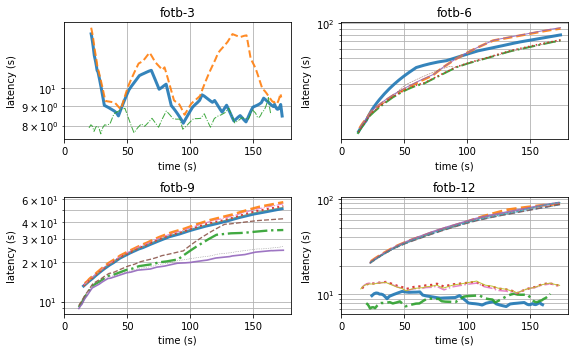

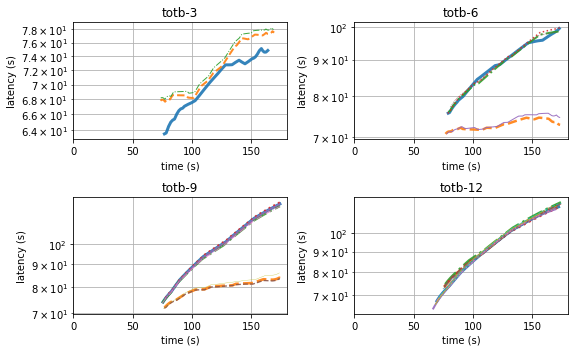

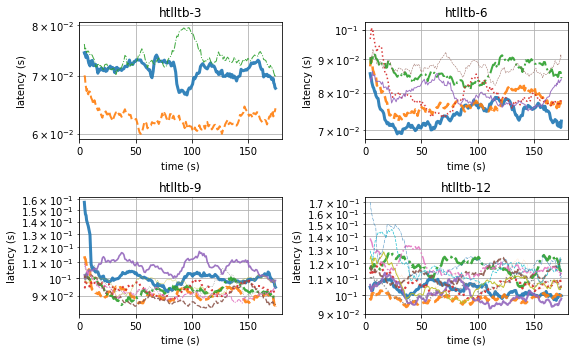

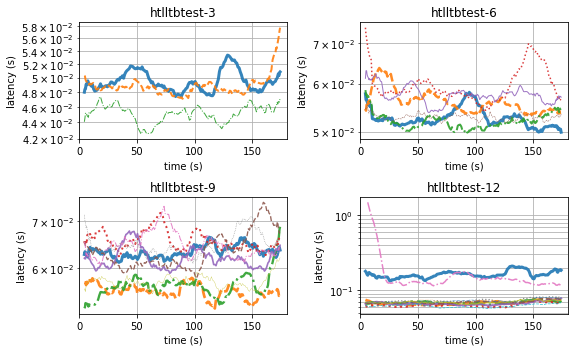

In [5]:
# latency time series for each process
for i, prefix in tqdm.tqdm(enumerate(prefixes)):
    if i%4==0:
        fig, axs = plt.subplots(2, 2, figsize=(1.618 * 5, 5), sharex=True)
        axs = numpy.ravel(axs)
    files = glob.glob('../data/' + prefix + '*')
    for j, file in enumerate(files):
        d = pandas.read_csv(file, sep=' ', comment="{") 
        d["t"] = d["time"] - d["time"].min()
        d["prefix"] = prefix
        d["file"] = file
        d = pandas.merge(d, d[d["operation"] == "deliver"], on=["processid", "messagenumber"], how="left", suffixes=('', '_y'))
        d["latency"] = d["t_y"] - d["t"]
        d["t"] = d["t_y"]
        d = d.filter(["prefix", "file", "operation", "processid", "messagenumber", "t", "latency"])
        df = d
        average_latency_time_series = pandas.DataFrame(pandas.DataFrame(df[(df["operation"] == "broadcast") & (df["t"] < workload_time)])).astype({'t': 'int'}).filter(["t", "latency"]).groupby("t").mean().reset_index()
        rz = average_latency_time_series.rolling(window=20, min_periods=0, center=True).mean()
        lw=3*(1-1*j/len(files))
        ls=['-','--','-.',':'][j%4]
        axs[i%4].set_title(prefix)
        axs[i%4].plot(rz["t"], rz["latency"], ls=ls, lw=lw, alpha=0.9)
        axs[i%4].set_ylabel("latency (s)")
        axs[i%4].set_xlabel("time (s)")
        axs[i%4].set_yscale("log")
        axs[i%4].set_xlim(0, workload_time)
        axs[i%4].grid(which="both", linestyle='-')
        axs[i%4].xaxis.set_tick_params(which='both', labelbottom=True)
    if i%4==3:
        plt.tight_layout()
        plt.savefig("../reports/" + prefix.split("-")[0] + "-latency.pdf")
        

16it [07:51, 29.47s/it]


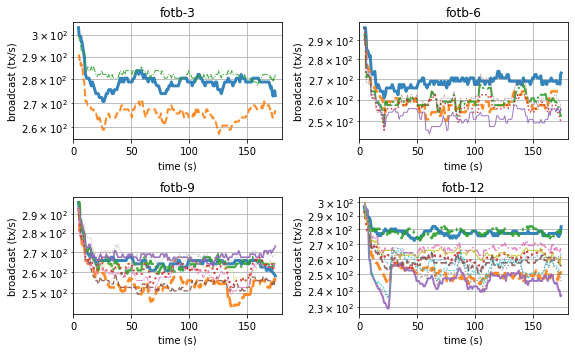

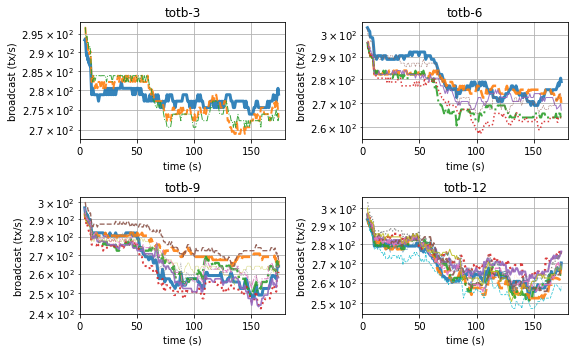

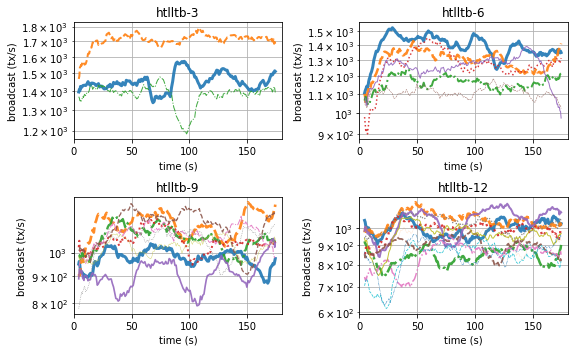

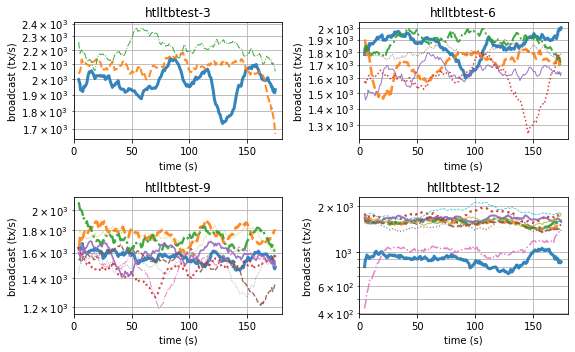

In [6]:
# broadcast time series for each process
for i, prefix in tqdm.tqdm(enumerate(prefixes)):
    if i%4==0:
        fig, axs = plt.subplots(2, 2, figsize=(1.618 * 5, 5), sharex=True)
        axs = numpy.ravel(axs)
    files = glob.glob('../data/' + prefix + '*')
    for j, file in enumerate(files):
        d = pandas.read_csv(file, sep=' ', comment="{") 
        d["t"] = d["time"] - d["time"].min()
        d["prefix"] = prefix
        d["file"] = file
        d = pandas.merge(d, d[d["operation"] == "deliver"], on=["processid", "messagenumber"], how="left", suffixes=('', '_y'))
        d["latency"] = d["t_y"] - d["t"]
        d = d.filter(["prefix", "file", "operation", "processid", "messagenumber", "t", "latency"])
        df = d
        average_broadcast_time_series = pandas.DataFrame(pandas.DataFrame(df[(df["operation"] == "broadcast") & (df["t"] < workload_time)]["t"].astype(int)).groupby("t").size()).reset_index().rename({0: "throughput"}, axis=1)
        average_broadcast_time_series = average_broadcast_time_series.merge(pandas.DataFrame(range(180), columns=["t"]), on="t", how="right", sort=True).fillna(0.0)
        rz = average_broadcast_time_series.rolling(window=20, min_periods=0, center=True).mean()
        lw=3*(1-1*j/len(files))
        ls=['-','--','-.',':'][j%4]
        axs[i%4].set_title(prefix)
        axs[i%4].plot(rz["t"], rz["throughput"], ls=ls, lw=lw, alpha=0.9)
        axs[i%4].set_ylabel("broadcast (tx/s)")
        axs[i%4].set_xlabel("time (s)")
        axs[i%4].set_yscale("log")
        axs[i%4].set_xlim(0, workload_time)
        axs[i%4].grid(which="both", linestyle='-')
        axs[i%4].xaxis.set_tick_params(which='both', labelbottom=True)
    if i%4==3:
        plt.tight_layout()
        plt.savefig("../reports/" + prefix.split("-")[0] + "-broadcast.pdf")
        